# Random Forest Classifier 

We will be building a model on the iris flower dataset, which is a very famous classification set. It comprises the sepal length, sepal width, petal length, petal width, and type of flowers. There are three species or classes: setosa, versicolor, and virginia. We will build a model to classify the type of flower. The dataset is available in the scikit-learn library or from the UCI Machine Learning Repository.

Start by importing the datasets library from scikit-learn, and load the iris dataset with load_iris()

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [ ]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names,'\n\n')

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica'] 


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# print the iris data (top 5 records)
print(iris.data[0:5],'\n\n')

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data.tail(5)

,sepal length,sepal width,petal length,petal width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

y_pred=rfc.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


You can also make a prediction for a single item, for example:

sepal length = 3

sepal width = 5

petal length = 4

petal width = 2

Now you can predict which type of flower it is.

In [ ]:
rfc.predict([[3, 5, 4, 2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [ ]:
rfc.predict([[1.2,2.3,1.7,3.0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

## Finding Important Features

In [ ]:
feature_imp = pd.Series(rfc.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.474942
petal length (cm)    0.457324
sepal length (cm)    0.049196
sepal width (cm)     0.018538
dtype: float64

No handles with labels found to put in legend.


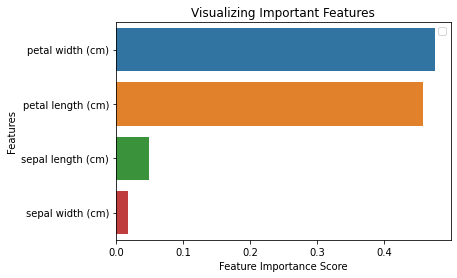

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Generating the Model on Selected Features

Here, you can remove the "sepal width and length" feature because it has very low importance, and select the 2 remaining features.

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# X1=data[['sepal width', 'petal length', 'petal width']]  # Features
X1=data[['petal length', 'petal width']]  # Features
y1=data['species']  # Labels

# Split dataset into training set and test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3,random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(n_estimators=10)
rfc1.fit(X_train1, y_train1)

y_pred1=rfc1.predict(X_test1)

In [ ]:
y_pred1

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 1.0


In [ ]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1, y_pred1) # confusion matrix

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 14]])

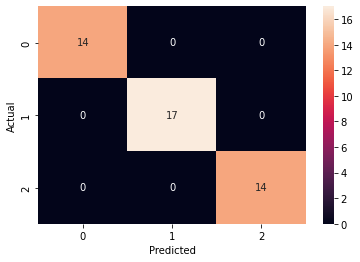

In [ ]:
# graph confusion matrix - selected features
conf_matrix = pd.crosstab(y_test1, y_pred1, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

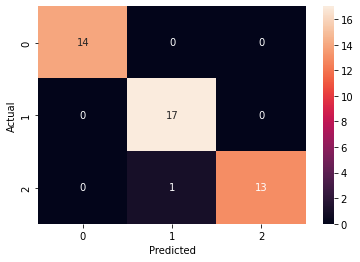

In [ ]:
# graph confusion matrix - random forest
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

In [ ]:
# Model Performance - selected features
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1)) # classification report. True-Positive, False-Positive, etc



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# Model Performance - random forest
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) # classification report. True-Positive, False-Positive, etc


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

